In [2654]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from random import uniform
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#...

## Loading the datasets

In [2656]:
# Loading the main dataset and print it
dataset = pd.read_csv('./arabic_dataset.csv', delimiter=";", index_col=0)
dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1698,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1699,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2657]:
# Loading the competition set and print it
competition = pd.read_csv('./competition.csv', delimiter=";", index_col=0)

In [2659]:
competition
# You should see that there are no labels in this dataset. You'll have to predict them.
# So this dataset can not be used to fit any classifier, just to make predictions with classifiers that you designed

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


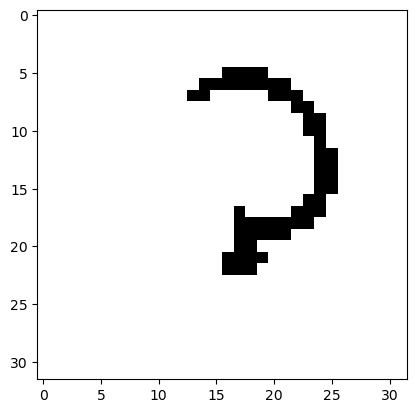

In [2660]:
# Here you can see the image 0 of the dataset
idx = 0
plt.imshow(dataset.iloc[idx,1:].to_numpy().reshape(32,32),cmap = 'Greys')
# you can change the value of idx if you want to see another image

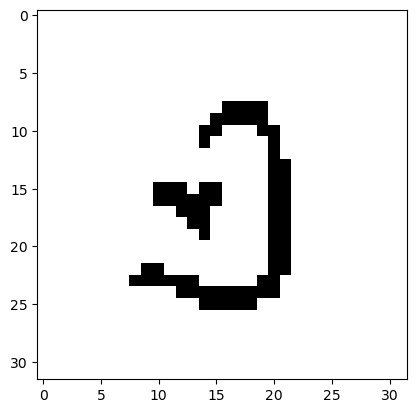

In [2661]:
# Same with the image 0 of competition
idx = 0
plt.imshow(competition.iloc[idx,:].to_numpy().reshape(32,32),cmap = 'Greys')

# First guided submission to Kaggle

In [2663]:
pred = random.choices(np.unique(dataset.label), k=500)
pred
# pred is a vector with 500 random values from the set of possible label values 
# we will assume that these are our 500 predictions for the competition set

[6,
 18,
 1,
 18,
 6,
 18,
 2,
 6,
 2,
 16,
 12,
 12,
 1,
 1,
 6,
 12,
 16,
 12,
 6,
 18,
 1,
 2,
 1,
 18,
 16,
 18,
 2,
 12,
 18,
 16,
 6,
 6,
 12,
 2,
 18,
 22,
 16,
 12,
 6,
 2,
 2,
 6,
 16,
 12,
 16,
 12,
 2,
 12,
 6,
 16,
 2,
 1,
 2,
 6,
 6,
 6,
 2,
 12,
 2,
 12,
 2,
 12,
 1,
 2,
 16,
 1,
 2,
 2,
 22,
 22,
 16,
 1,
 6,
 22,
 2,
 12,
 6,
 2,
 22,
 16,
 12,
 2,
 16,
 2,
 22,
 12,
 18,
 1,
 6,
 1,
 1,
 2,
 6,
 16,
 12,
 16,
 22,
 18,
 12,
 1,
 12,
 6,
 6,
 12,
 22,
 16,
 22,
 6,
 16,
 6,
 22,
 18,
 1,
 22,
 16,
 6,
 16,
 22,
 6,
 16,
 1,
 18,
 16,
 2,
 22,
 12,
 1,
 22,
 1,
 16,
 1,
 2,
 6,
 22,
 12,
 6,
 18,
 12,
 22,
 2,
 18,
 2,
 1,
 2,
 2,
 1,
 2,
 12,
 2,
 22,
 6,
 16,
 6,
 16,
 1,
 18,
 12,
 16,
 1,
 18,
 12,
 6,
 12,
 1,
 12,
 6,
 1,
 18,
 16,
 1,
 1,
 6,
 6,
 22,
 22,
 12,
 16,
 18,
 1,
 1,
 6,
 22,
 12,
 22,
 1,
 18,
 6,
 2,
 2,
 18,
 22,
 1,
 1,
 1,
 18,
 12,
 2,
 22,
 18,
 1,
 1,
 16,
 22,
 1,
 12,
 1,
 22,
 18,
 2,
 2,
 1,
 6,
 16,
 6,
 6,
 18,
 22,
 6,
 2,
 6,
 1,
 6,
 6

In [2664]:
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df

,Id,label
0,1,6
1,2,18
2,3,1
3,4,18
4,5,6
...,...,...
495,496,6
496,497,6
497,498,22
498,499,12


In [2665]:
# then save it to a csv file
df.to_csv('myfirstsubmission.csv', index=False)
# You should now have a csv file on your working directory
# Go on Kaggle website, join the competition and drag this file into 'Submit predictions'. You should have a score
# This score might not be high because we have just done random predictions
# but when you'll design classifiers and make more clever predictions you will improve your score
# Later, when you'll have found an interesting classifier for each family, you have to predict the competition set
# with this classifier, put these predictions into a vector (like pred above) and apply the same procedure as
# in the previous cell

## Part 1 : preliminar analysis of the dataset

In [2667]:
# TODO

In [2668]:
# Description et Analyse du jeu de données arabic_dataset.csv

In [2669]:
# Afficher les dimensions du jeu de données arabic_dataset.csv
print(f"Dimensions du jeu de données : {dataset.shape}")

# Afficher les premières lignes du dataset
print(dataset.head())

# Compter le nombre d'exemples par label
print(dataset['label'].value_counts())

Dimensions du jeu de données : (1700, 1025)
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
1     12       0       0       0       0       0       0       0       0   
2     22       0       0       0       0       0       0       0       0   
3     16       0       0       0       0       0       0       0       0   
4      1       0       0       0       0       0       0       0       0   
5      2       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel1015  pixel1016  pixel1017  pixel1018  pixel1019  \
1       0  ...          0          0          0          0          0   
2       0  ...          0          0          0          0          0   
3       0  ...          0          0          0          0          0   
4       0  ...          0          0          0          0          0   
5       0  ...          0          0          0          0          0   

   pixel1020  pixel1021  pixel1022  pixel1023  pixel1024  
1

## Part 2 : classifiers based on raw images

### Decision trees

In [2672]:
# TODO

In [2673]:
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

In [2674]:
print(dataset.shape)
print(data_train.shape)
print(data_test.shape)
print(data_valid.shape)

(1700, 1025)
(1190, 1025)
(255, 1025)
(255, 1025)


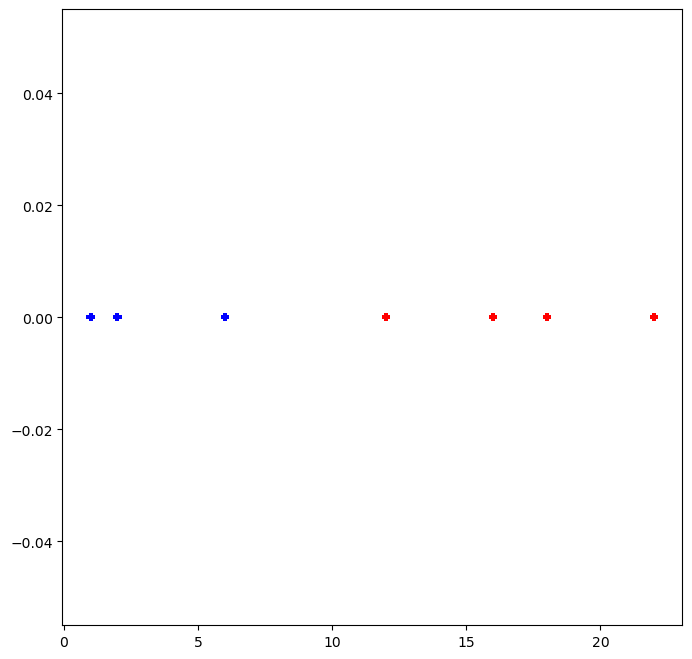

In [2675]:
color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
fig = plt.figure(figsize=  (8,8))
fig = plt.scatter(data_train.iloc[:,0], data_train.iloc[:,1], c = data_train.label, cmap = color_map, marker='+')

In [2676]:
## Ajustement d'un arbre de décision

In [2677]:
dt = tree.DecisionTreeClassifier().fit(data_train.iloc[:,1:],data_train.label)

In [2678]:
## Visualisation de l'arbre de l'arbre obtenu

[Text(0.8615650997922508, 0.9827586206896551, 'x[689] <= 0.5\ngini = 0.857\nsamples = 1190\nvalue = [157, 158, 184, 177, 168, 169, 177]'),
 Text(0.7671835291556077, 0.9482758620689655, 'x[486] <= 0.5\ngini = 0.85\nsamples = 934\nvalue = [151, 107, 176, 99, 94, 159, 148]'),
 Text(0.6923806023292742, 0.9137931034482759, 'x[754] <= 0.5\ngini = 0.849\nsamples = 851\nvalue = [98.0, 107.0, 166.0, 99.0, 88.0, 147.0, 146.0]'),
 Text(0.6122818969083603, 0.8793103448275862, 'x[783] <= 0.5\ngini = 0.838\nsamples = 711\nvalue = [95.0, 64.0, 164.0, 81.0, 57.0, 144.0, 106.0]'),
 Text(0.5586495725977592, 0.8448275862068966, 'x[626] <= 0.5\ngini = 0.82\nsamples = 611\nvalue = [94.0, 43.0, 163.0, 53.0, 42.0, 141.0, 75.0]'),
 Text(0.5157190097553377, 0.8103448275862069, 'x[848] <= 0.5\ngini = 0.796\nsamples = 519\nvalue = [75, 40, 158, 38, 21, 135, 52]'),
 Text(0.4776381699997649, 0.7758620689655172, 'x[913] <= 0.5\ngini = 0.785\nsamples = 497\nvalue = [75, 34, 158, 37, 21, 135, 37]'),
 Text(0.419535181

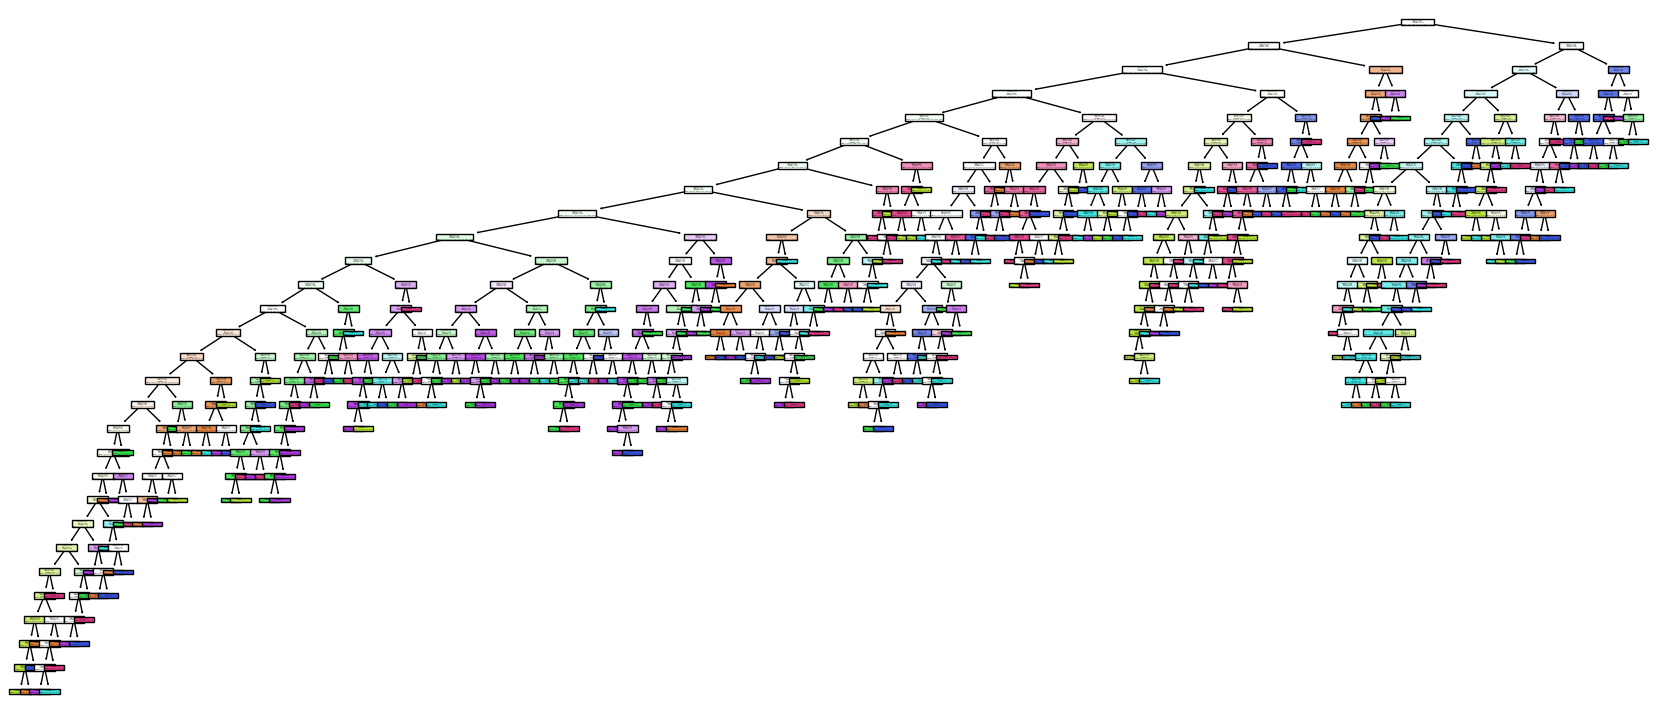

In [2679]:
plt.figure(figsize=(21, 9))
tree.plot_tree(dt, filled=True)

In [2680]:
#On peut obtenir automatiquement la prédiction de l'arbre pour tout exemple avec la commande 'predict' (comme pour la régression logistique) :
dt.predict(data_train.iloc[:,1:])

array([ 6, 16, 16, ..., 22,  6, 18], dtype=int64)

In [2681]:
# ici je demande de prédire le premier exemple de la série de train, il faut donner ses caractéristiques
dt.predict(data_train.iloc[:,1:])[0]

6

In [2682]:
# Score de performance de cet arbre sur l'ensemble de training
dt.score(data_train.iloc[:,1:], data_train.label) 

# le score toute les lignes du data_train et les colonnes de 0 à 2 c-a-d la variable Y exclu

1.0

In [2683]:
# le score pour les données de validation
dt.score(data_valid.iloc[:,1:], data_valid.label) 

0.5490196078431373

In [2684]:
clf = tree.DecisionTreeClassifier()

# then ask for all the possible values(Toutes les valeurs possibles
path = clf.cost_complexity_pruning_path(data_train.iloc[:,1:], data_train.label)
path

{'ccp_alphas': array([0.        , 0.00078031, 0.00078782, 0.00080032, 0.00081487,
        0.00081822, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
        0.00112045, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
        0.00112045, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
        0.00112045, 0.00112045, 0.00112045, 0.0012605 , 0.0012605 ,
        0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 ,
        0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 ,
        0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 ,
        0.00130719, 0.00130719, 0.

Text(0, 0.5, 'total impurity of leaves (des feuilles)')

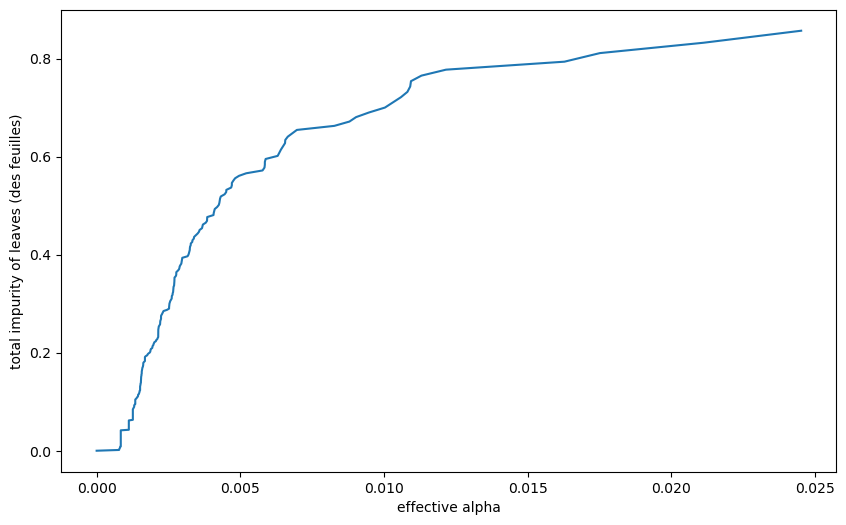

In [2685]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves (des feuilles)")

In [2686]:
dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[2]).fit(data_train.iloc[:,1:], data_train.label)

#Demandons la troisième valeur parmi toutes les alphas possibles
dt_pruned

DecisionTreeClassifier(ccp_alpha=0.0007878151260504202)

[Text(0.8561614524929556, 0.9827586206896551, 'x[689] <= 0.5\ngini = 0.857\nsamples = 1190\nvalue = [157, 158, 184, 177, 168, 169, 177]'),
 Text(0.7571814868614489, 0.9482758620689655, 'x[486] <= 0.5\ngini = 0.85\nsamples = 934\nvalue = [151, 107, 176, 99, 94, 159, 148]'),
 Text(0.6804082848786192, 0.9137931034482759, 'x[754] <= 0.5\ngini = 0.849\nsamples = 851\nvalue = [98.0, 107.0, 166.0, 99.0, 88.0, 147.0, 146.0]'),
 Text(0.5975052228496768, 0.8793103448275862, 'x[783] <= 0.5\ngini = 0.838\nsamples = 711\nvalue = [95.0, 64.0, 164.0, 81.0, 57.0, 144.0, 106.0]'),
 Text(0.5400061440073547, 0.8448275862068966, 'x[626] <= 0.5\ngini = 0.82\nsamples = 611\nvalue = [94.0, 43.0, 163.0, 53.0, 42.0, 141.0, 75.0]'),
 Text(0.4903937047052743, 0.8103448275862069, 'x[848] <= 0.5\ngini = 0.796\nsamples = 519\nvalue = [75, 40, 158, 38, 21, 135, 52]'),
 Text(0.4546426813730762, 0.7758620689655172, 'x[913] <= 0.5\ngini = 0.785\nsamples = 497\nvalue = [75, 34, 158, 37, 21, 135, 37]'),
 Text(0.414304003

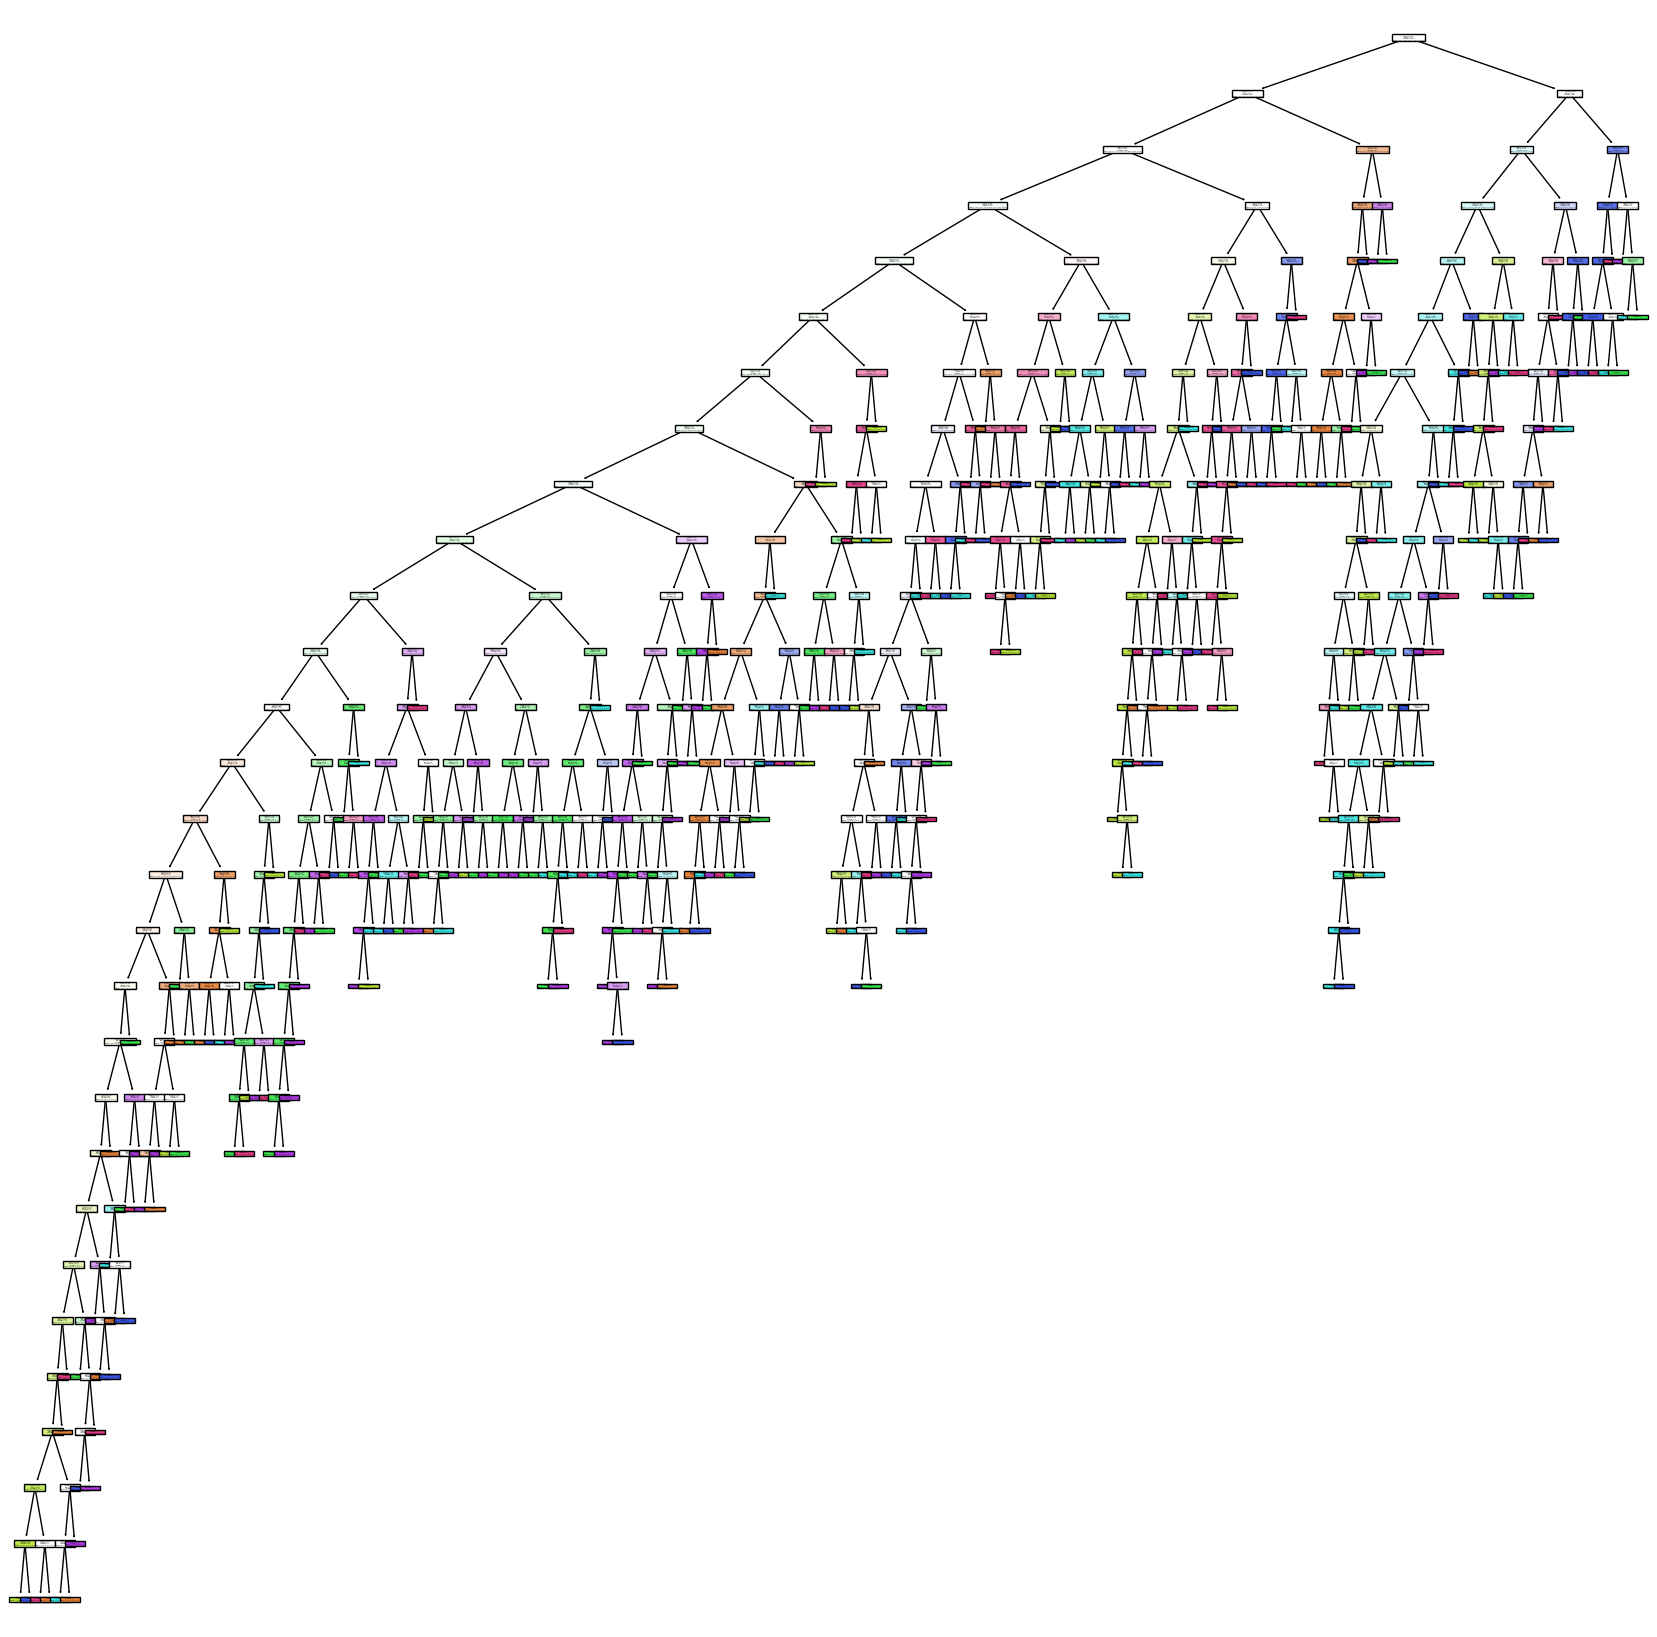

In [2687]:
# Traçons l'arbre obtenu pour visualiser la différence avec celui obtenu précédemment 

plt.figure(figsize=(21, 21))
tree.plot_tree(dt_pruned, filled=True)

In [2689]:
# Calculez sa performance sur l'ensemble de train et de validation

print(dt_pruned.score(data_train.iloc[:,1:], data_train.label))
print(dt_pruned.score(data_valid.iloc[:,1:], data_valid.label))

0.9983193277310924
0.5058823529411764


In [2691]:
path.ccp_alphas.shape # valeurs de alpha

(248,)

In [2692]:
# calcul des scores de prédiction de tous les arbres élagués possibles sur l'ensemble de (training) et de valid

score_train = []
score_valid = []
lr_models = {}

clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(data_train.iloc[:,1:], data_train.label)


for i in path.ccp_alphas:
    alpha = tree.DecisionTreeClassifier(ccp_alpha=i).fit(data_train.iloc[:,1:], data_train.label)
    
    score_train.append(alpha.score(data_train.iloc[:,1:], data_train.label))
    score_valid.append(alpha.score(data_valid.iloc[:,1:], data_valid.label))
    

In [2693]:
# les scores sur les données de train
print(score_train) 

# les score sur les données de validation
print(score_valid) 

[1.0, 0.9991596638655462, 0.9983193277310924, 0.9974789915966387, 0.9966386554621849, 0.9957983193277311, 0.9630252100840336, 0.9638655462184874, 0.9647058823529412, 0.9630252100840336, 0.9630252100840336, 0.9638655462184874, 0.9638655462184874, 0.9630252100840336, 0.9630252100840336, 0.9638655462184874, 0.9630252100840336, 0.9630252100840336, 0.9638655462184874, 0.9647058823529412, 0.9638655462184874, 0.9647058823529412, 0.9638655462184874, 0.9638655462184874, 0.9638655462184874, 0.9647058823529412, 0.9647058823529412, 0.9638655462184874, 0.9630252100840336, 0.9638655462184874, 0.9638655462184874, 0.9630252100840336, 0.9638655462184874, 0.9630252100840336, 0.9630252100840336, 0.9638655462184874, 0.9495798319327731, 0.9470588235294117, 0.9478991596638655, 0.946218487394958, 0.9504201680672268, 0.946218487394958, 0.9512605042016806, 0.9478991596638655, 0.9504201680672268, 0.9470588235294117, 0.9487394957983193, 0.9504201680672268, 0.946218487394958, 0.946218487394958, 0.9495798319327731

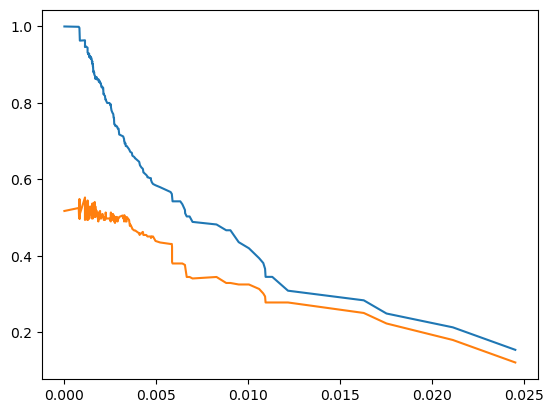

In [2694]:
# Plot on a graph these scores VS alpha (2 different curves).
plt.plot(path.ccp_alphas, score_train)
plt.plot(path.ccp_alphas, score_valid)

In [2695]:
# l'arbre de Décision à l'ensemble de training 
dt = tree.DecisionTreeClassifier().fit(data_train.iloc[:,1:],data_train.label)
dt

DecisionTreeClassifier()

In [2712]:
# Score sur l'ensemble de Validation
dt.score(data_valid.iloc[:,1:], data_valid.label)

0.4980392156862745

In [2713]:
# Score sur l'ensemble de training
dt.score(data_train.iloc[:,1:], data_train.label)

1.0

In [2714]:
# j'ai un très bon score sur l'ensemble de traning

In [2715]:
path.ccp_alphas.shape

(247,)

In [2716]:
score_train = []
score_valid = []
lr_models = []

clf = tree.DecisionTreeClassifier() # first declare a tree
path = clf.cost_complexity_pruning_path(data_train.iloc[:,1:], data_train.label) # then ask for all the possible values/tte les valeurs possibles


for i in path.ccp_alphas:
    alpha = tree.DecisionTreeClassifier(ccp_alpha=i).fit(data_train.iloc[:,1:], data_train.label)
    
    score_train.append(alpha.score(data_train.iloc[:,1:], data_train.label))
    score_valid.append(alpha.score(data_valid.iloc[:,1:], data_valid.label))
    
print('Score des données de training', score_train, end="\n\n\n\n\n")
print('Score des données de Validation', score_valid)

Score des données de training [1.0, 0.9991596638655462, 0.9983193277310924, 0.9974789915966387, 0.9966386554621849, 0.9957983193277311, 0.9630252100840336, 0.9647058823529412, 0.9647058823529412, 0.9638655462184874, 0.9638655462184874, 0.9621848739495799, 0.9630252100840336, 0.9638655462184874, 0.9647058823529412, 0.9638655462184874, 0.9630252100840336, 0.9638655462184874, 0.9630252100840336, 0.9638655462184874, 0.9638655462184874, 0.9638655462184874, 0.9638655462184874, 0.9647058823529412, 0.9621848739495799, 0.9638655462184874, 0.9647058823529412, 0.9630252100840336, 0.9647058823529412, 0.9630252100840336, 0.9638655462184874, 0.9647058823529412, 0.9630252100840336, 0.9638655462184874, 0.9638655462184874, 0.9630252100840336, 0.9630252100840336, 0.9495798319327731, 0.9478991596638655, 0.946218487394958, 0.9504201680672268, 0.9478991596638655, 0.9470588235294117, 0.9470588235294117, 0.9470588235294117, 0.9470588235294117, 0.946218487394958, 0.9504201680672268, 0.946218487394958, 0.94705

In [2717]:
# le meilleur score sur ensemble de training
print(max(score_train))

#  le meilleur score sur ensemble de validation
print(max(score_valid)) 

1.0
0.5450980392156862


In [2718]:
# l'index correspondant au meilleur score en validation
print(score_valid.index(max(score_valid))) 

# l'index correspondant au meilleur score en training
print(score_train.index(max(score_train))) 

18
0


In [2719]:
# l'estimation de l'erreur de généralisation de l'arbre
dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[50]).fit(data_train.iloc[:,1:], data_train.label)
dt_pruned

DecisionTreeClassifier(ccp_alpha=0.0011204481792717086)

In [2720]:
# Erreur de généralisation sur le dt_pruned
dt_pruned.score(data_test.iloc[:,1:], data_test.label) 

0.5137254901960784

In [2721]:
dt_pruned.score(data_valid.iloc[:,1:], data_valid.label) 

0.5254901960784314

In [2722]:
# Prédiction du modèle dt_pruned sur la dataset competition
dt1 = dt_pruned.predict(competition.iloc[:,:])

In [2723]:
# Les données predictes
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = dt1
df

,Id,label
0,1,22
1,2,1
2,3,12
3,4,16
4,5,16
...,...,...
495,496,2
496,497,1
497,498,18
498,499,22


In [2724]:
df.to_csv('myfirstsubmission_decision_tree.csv', index=False)

### SVM

In [2726]:
# TODO

In [2727]:
# Exemple pour chaque valeur de label
dataset.label.value_counts()

label
12    255
6     250
22    245
18    241
1     238
2     238
16    233
Name: count, dtype: int64

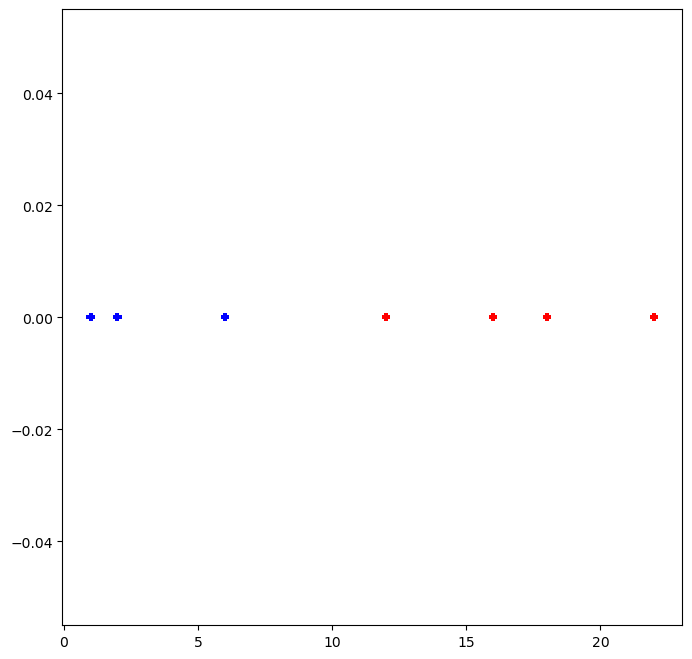

In [2728]:
color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
fig = plt.figure(figsize=  (8,8))
fig = plt.scatter(dataset.iloc[:,0], dataset.iloc[:,1], c = dataset.label, cmap = color_map, marker='+')

In [2729]:
# ici SVC signifie Support Vector Classification (il existe d'autres types de SVM), et nous cherchons un noyau linéaire.
# Le paramètre C est fixé à 0.01

model_svm = svm.SVC(C = 0.01, kernel = 'linear')

In [2730]:
# Ajuster le modèle en utilisant les caractéristiqueset la cible label
model_svm.fit(dataset.iloc[:,1:], dataset.label)

SVC(C=0.01, kernel='linear')

In [2731]:
# les vecteurs de support trouvés par le SVC. 

model_svm.support_vectors_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [2732]:
# l'index des vecteurs de support dans l'ensemble de données. 
model_svm.support_

array([   7,   14,   17, ..., 1673, 1675, 1697])

In [2733]:
# les coefficients de lagrange associés aux vecteurs de support (w1, w2 et w3)
model_svm.dual_coef_

array([[ 0.01      ,  0.        ,  0.00842909, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.01      ,  0.01      ,  0.        , ..., -0.        ,
        -0.01      , -0.        ],
       [ 0.01      ,  0.00619186,  0.01      , ..., -0.01      ,
        -0.        , -0.        ],
       [ 0.0083079 ,  0.01      ,  0.01      , ..., -0.        ,
        -0.01      , -0.00265034],
       [ 0.01      ,  0.01      ,  0.01      , ..., -0.        ,
        -0.00105681, -0.        ],
       [ 0.01      ,  0.01      ,  0.01      , ..., -0.01      ,
        -0.        , -0.        ]])

In [2734]:
# les constantes du modèle (w0, ...)
model_svm.intercept_

array([ 0.29071799,  1.31584439,  1.0438777 ,  1.60074372,  1.44170772,
        1.23456046,  0.92133863,  1.73967755,  1.77706995,  1.07502576,
        1.60598725,  0.22027568,  0.98105395,  0.49802589,  0.64706578,
        0.98715638,  0.06795849,  0.13627234, -0.73859438, -0.99615898,
        0.33932315])

In [2735]:
model_svm.decision_function(dataset.iloc[:,1:])

array([[-0.28602518,  4.18315858,  1.72970172, ...,  4.21647388,
         0.72206957,  4.23952072],
       [ 0.73062007, -0.25185872,  5.25782014, ...,  2.80185012,
         4.21362679,  6.28573901],
       [ 0.74256747, -0.30325555,  4.23144019, ...,  6.29259443,
         5.24786757,  3.20268769],
       ...,
       [-0.30112885,  0.69897156,  5.28967777, ...,  1.70696778,
         3.25590349,  6.30665976],
       [-0.30276502,  3.25090175,  1.71224419, ...,  5.26689277,
         0.71272534,  4.28938994],
       [-0.31199756,  0.70117646,  1.74231608, ...,  6.31412954,
         2.75850189,  5.29455642]])

In [2736]:
model_svm.score(dataset.iloc[:,1:], dataset.label)

0.82

In [2737]:
model_svm.predict(dataset.iloc[:,1:])

array([12, 22, 16, ..., 22, 12, 16], dtype=int64)

In [2738]:
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

In [2739]:
model_svm = svm.SVC(C = 0.01, kernel = 'linear').fit(data_train.iloc[:,1:], data_train.label)
print(model_svm.score(data_train.iloc[:,1:], data_train.label))
print(model_svm.score(data_valid.iloc[:,1:], data_valid.label))
print(model_svm.score(data_test.iloc[:,1:], data_test.label))

0.819327731092437
0.7372549019607844
0.7215686274509804


In [2740]:
svm_lineaire = model_svm.predict(competition.iloc[:,:])

In [2741]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = svm_lineaire
df

,Id,label
0,1,22
1,2,16
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,16
497,498,18
498,499,22


In [2742]:
df.to_csv('myfirstsubmission_svm_lineaire.csv', index=False)

In [2743]:
# Après avoir essayer différents paramètres de C, j'ai gardé 0.01 qui est le bon pour continuer
model_svm = svm.SVC(C = 0.01, kernel = 'poly')

In [2744]:
model_svm.fit(dataset.iloc[:,1:], dataset.label)

SVC(C=0.01, kernel='poly')

In [2745]:
model_svm.support_vectors_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [2746]:
model_svm.decision_function(dataset.iloc[:,1:])

array([[ 0.77184591,  1.77558343,  5.25917039, ..., -0.28010298,
         2.81540076,  4.20085088],
       [ 0.77200935,  1.77500052,  5.26090693, ..., -0.28026189,
         2.82577909,  4.21152533],
       [ 1.77165524,  0.7627575 ,  5.2582011 , ..., -0.26992865,
         2.81496716,  4.20373269],
       ...,
       [ 0.76117895,  1.7632795 ,  5.26156886, ..., -0.28234176,
         2.8429234 ,  4.24095792],
       [ 0.7679719 ,  1.77701264,  5.2571519 , ..., -0.27856075,
         2.81032492,  4.20176941],
       [ 0.7477567 ,  1.75223551,  5.24834158, ..., -0.23144972,
         2.78933901,  4.212191  ]])

In [2747]:
model_svm.score(dataset.iloc[:,1:], dataset.label)

0.15

In [2748]:
model_svm.predict(dataset.iloc[:,1:])

array([12, 12, 12, ..., 12, 12, 12], dtype=int64)

In [2749]:
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

In [2750]:
model_svm = svm.SVC(C = 0.01, kernel = 'poly').fit(data_train.iloc[:,1:], data_train.label)
print(model_svm.score(data_train.iloc[:,1:], data_train.label))
print(model_svm.score(data_valid.iloc[:,1:], data_valid.label))
print(model_svm.score(data_test.iloc[:,1:], data_test.label))

0.1546218487394958
0.12156862745098039
0.13725490196078433


In [2751]:
model_svm = svm.SVC(C = 0.01, kernel = 'poly', gamma = 10).fit(data_train.iloc[:,1:], data_train.label)
print(model_svm.score(data_train.iloc[:,1:], data_train.label))
print(model_svm.score(data_valid.iloc[:,1:], data_valid.label))
print(model_svm.score(data_test.iloc[:,1:], data_test.label))

1.0
0.7764705882352941
0.7803921568627451


In [2752]:
svm_poly = model_svm.predict(competition.iloc[:,:])

In [2753]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = svm_poly
df

,Id,label
0,1,22
1,2,16
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,2
497,498,1
498,499,22


In [2754]:
df.to_csv('myfirstsubmission_svm_poly.csv', index=False)

In [2755]:
model_svm = svm.SVC(C = 0.01, kernel = 'rbf')

In [2756]:
model_svm.fit(dataset.iloc[:,1:], dataset.label)

SVC(C=0.01)

In [2757]:
model_svm.support_vectors_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [2758]:
model_svm.decision_function(dataset.iloc[:,1:])

array([[ 0.74979314,  1.76145782,  5.25835871, ..., -0.278499  ,
         2.9083137 ,  4.21266585],
       [ 0.7543019 ,  1.75373712,  5.26348456, ..., -0.27970039,
         2.97781404,  4.22272362],
       [ 1.7560064 ,  0.74738879,  5.2626854 , ..., -0.27676685,
         2.96830744,  4.21886232],
       ...,
       [ 0.74367076,  1.74774362,  5.26526076, ..., -0.27943947,
         3.04677596,  4.22913345],
       [ 0.74500783,  1.76631587,  5.25694083, ..., -0.27760469,
         2.89727727,  4.21779393],
       [ 0.7435778 ,  1.74830943,  5.26077677, ..., -0.27372569,
         2.95326194,  4.22610899]])

In [2759]:
model_svm.score(dataset.iloc[:,1:], dataset.label)

0.15

In [2760]:
model_svm.predict(dataset.iloc[:,1:])

array([12, 12, 12, ..., 12, 12, 12], dtype=int64)

In [2761]:
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

In [2762]:
model_svm1 = svm.SVC(C = 0.01, kernel = 'rbf').fit(data_train.iloc[:,1:], data_train.label)
print(model_svm1.score(data_train.iloc[:,1:], data_train.label))
print(model_svm1.score(data_valid.iloc[:,1:], data_valid.label))
print(model_svm1.score(data_test.iloc[:,1:], data_test.label))

0.1546218487394958
0.12156862745098039
0.13725490196078433


In [2763]:
svm_rbf = model_svm1.predict(competition.iloc[:,:])

In [2764]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = svm_rbf
df

,Id,label
0,1,6
1,2,6
2,3,6
3,4,6
4,5,6
...,...,...
495,496,6
496,497,6
497,498,6
498,499,6


In [2765]:
df.to_csv('myfirstsubmission_svm_poly2.csv', index=False)

### K-nearest-neighbour

In [2767]:
n_n = KNeighborsClassifier(n_neighbors=1)
n_n.fit(data_train.iloc[:,1:],data_train.label)

KNeighborsClassifier(n_neighbors=1)

In [2768]:
n_n.score(data_train.iloc[0:2,1:], data_train.iloc[0:2,0])

print("Le score des données de train", n_n.score(data_valid.iloc[:,1:], data_valid.label))
print("Le scrore des données de validation", n_n.score(data_test.iloc[:,1:], data_test.label))

Le score des données de train 0.7490196078431373
Le scrore des données de validation 0.7294117647058823


In [2769]:
# On va faire une boucle for pour selectionner la meilleure valeurt de "k"

# On initialise knn pour k=2
errors = []
for k in range(2,30):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(knn.fit(data_train.iloc[:,1:],data_train.label).score(data_valid.iloc[:,1:], data_valid.label))
    print(errors)


[0.6470588235294118]
[0.6470588235294118, 0.6823529411764706]
[0.6470588235294118, 0.6823529411764706, 0.6509803921568628]
[0.6470588235294118, 0.6823529411764706, 0.6509803921568628, 0.6666666666666666]
[0.6470588235294118, 0.6823529411764706, 0.6509803921568628, 0.6666666666666666, 0.6392156862745098]
[0.6470588235294118, 0.6823529411764706, 0.6509803921568628, 0.6666666666666666, 0.6392156862745098, 0.6313725490196078]
[0.6470588235294118, 0.6823529411764706, 0.6509803921568628, 0.6666666666666666, 0.6392156862745098, 0.6313725490196078, 0.6352941176470588]
[0.6470588235294118, 0.6823529411764706, 0.6509803921568628, 0.6666666666666666, 0.6392156862745098, 0.6313725490196078, 0.6352941176470588, 0.6392156862745098]
[0.6470588235294118, 0.6823529411764706, 0.6509803921568628, 0.6666666666666666, 0.6392156862745098, 0.6313725490196078, 0.6352941176470588, 0.6392156862745098, 0.6549019607843137]
[0.6470588235294118, 0.6823529411764706, 0.6509803921568628, 0.6666666666666666, 0.63921568

In [2770]:
n_n1 = KNeighborsClassifier(n_neighbors=5)  
n_n1.fit(data_train.iloc[:,1:],data_train.label)

KNeighborsClassifier()

In [2771]:
# Prédire le premier exemple de la série de train, donner ses caractéristiques : 
pr = n_n1.predict(data_train.iloc[0:2,1:])
pr
# predire sur l'ensemble de notre dataset.
pred_all = n_n1.predict(data_train.iloc[:,1:])
pred_all

array([ 6, 16,  6, ..., 22,  6, 18], dtype=int64)

In [2772]:
n_n1.score(data_valid.iloc[:,1:], data_valid.label)

# Erreur de généralisation sur le modèle n_n1
print(n_n1.score(data_test.iloc[:,1:], data_test.label))
print(n_n1.score(data_valid.iloc[:,1:], data_valid.label))

0.6627450980392157
0.6666666666666666


In [2773]:
# La prédiction du nouveau modèle
knn = n_n1.predict(competition.iloc[:,:])

In [2774]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = knn
df

,Id,label
0,1,22
1,2,18
2,3,16
3,4,1
4,5,16
...,...,...
495,496,2
496,497,16
497,498,1
498,499,22


In [2775]:
df.to_csv('myfirstsubmission_knn.csv', index=False)

### Random forest

In [2777]:
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

In [2778]:
print(data_train.shape)
print(data_test.shape)
print(data_valid.shape)

(1190, 1025)
(255, 1025)
(255, 1025)


In [2779]:
#Initialisation d'un Random Forest avec n =  10 arbres.

r_f = RandomForestClassifier(n_estimators=10) 

r_f.fit(data_train.iloc[:,1:],data_train.label) 

RandomForestClassifier(n_estimators=10)

In [2780]:
# Les lignes de 0 à 2 et les colonnes à partir des données de pixel.

r_f.predict(data_train.iloc[0:2,1:])

array([ 6, 16], dtype=int64)

In [2781]:
# Vérification de la données predire

data_train.iloc[0:2,0]  

248     6
436    16
Name: label, dtype: int64

In [2782]:
# Le score sur l'ensemble d'apprentissage
r_f.score(data_train.iloc[:,1:], data_train.iloc[:,0]) 

0.9941176470588236

In [2783]:
# Le score sur l'ensemble de validation
r_f.score(data_valid.iloc[:,1:], data_valid.iloc[:,0])

0.6509803921568628

In [2784]:
# Differentes forêts aléatoires
# Utilisons une boucle pour selectionner la meilleure valeur de i

errors = []
for i in range(1,40):
    models = RandomForestClassifier(n_estimators=i)
    errors.append(models.fit(data_train.iloc[:,1:],data_train.label).score(data_test.iloc[:,1:], data_test.label))
    print(errors)

[0.396078431372549]
[0.396078431372549, 0.4549019607843137]
[0.396078431372549, 0.4549019607843137, 0.5333333333333333]
[0.396078431372549, 0.4549019607843137, 0.5333333333333333, 0.611764705882353]
[0.396078431372549, 0.4549019607843137, 0.5333333333333333, 0.611764705882353, 0.6039215686274509]
[0.396078431372549, 0.4549019607843137, 0.5333333333333333, 0.611764705882353, 0.6039215686274509, 0.5882352941176471]
[0.396078431372549, 0.4549019607843137, 0.5333333333333333, 0.611764705882353, 0.6039215686274509, 0.5882352941176471, 0.6784313725490196]
[0.396078431372549, 0.4549019607843137, 0.5333333333333333, 0.611764705882353, 0.6039215686274509, 0.5882352941176471, 0.6784313725490196, 0.6470588235294118]
[0.396078431372549, 0.4549019607843137, 0.5333333333333333, 0.611764705882353, 0.6039215686274509, 0.5882352941176471, 0.6784313725490196, 0.6470588235294118, 0.6392156862745098]
[0.396078431372549, 0.4549019607843137, 0.5333333333333333, 0.611764705882353, 0.6039215686274509, 0.58823

In [2785]:
print(max(errors))  
errors.index(max(errors))

0.803921568627451


36

In [2786]:
r_f1 = RandomForestClassifier(n_estimators=27)
r_f1.fit(data_train.iloc[:,1:],data_train.label) 

RandomForestClassifier(n_estimators=27)

In [2787]:
print(r_f1.score(data_valid.iloc[:,1:], data_valid.label))
print(r_f1.score(data_test.iloc[:,1:], data_test.label))

0.7254901960784313
0.7294117647058823


In [2788]:
# La prédiction de notre jeu de données sur le modèle r_f1

randon_foret = r_f1.predict(competition.iloc[:,:]) 

In [2789]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = randon_foret
df

,Id,label
0,1,22
1,2,1
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,16
497,498,18
498,499,22


In [2790]:
df.to_csv('myfirstsubmission_randon_forest.csv', index=False)

### Logistic regression

In [2792]:
dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1698,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1699,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2793]:
# Les valeurs de la Variable cible label
label = dataset['label']
distribut = label.value_counts()
distribut

label
12    255
6     250
22    245
18    241
1     238
2     238
16    233
Name: count, dtype: int64

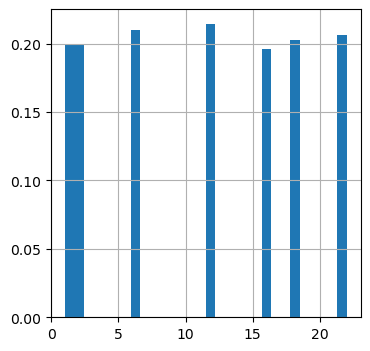

In [2794]:
# Pour voir la distribution des valeurs cibles, je vais utiliser la même méthode ci-dessus, 

dataset.label.hist(bins=30, figsize=(4,4), density=True)
plt.show()

In [2795]:
# Il est conseillé de « normaliser » les caractéristiques avant d'appliquer un modèle de régression logistique. 
# Normaliser signifie de transformer chaque caractéristique de façon à ce que la moyenne de chaque caractéristique soit 0 et l'écart type 1.
# Cette opération peut être effectuée à l'aide des commandes suivantes: 

# pixel_dataset contient les caractéristiques
pixel_dataset = dataset.iloc[:,1:] 

# label_dataset contient les class
label_dataset = dataset.label

# StandardScaler is the command to standardize
scaler = preprocessing.StandardScaler().fit(pixel_dataset)
pixel_dataset = scaler.transform(pixel_dataset)
pixel_dataset = pd.DataFrame(pixel_dataset)

# Now the features are standardized inside the table pixel_dataset
# data_dataset contains the features (standardized) and the class (column 'label')
data_dataset = pixel_dataset
data_dataset['label'] = label_dataset

In [2796]:
moyenne = np.mean(data_dataset.iloc[:,1:])
moyenne

0.010750235954869005

In [2797]:
# Apprentissage = 70%, validation = 15%, test = 15%,
data_train, data_test = train_test_split( dataset, test_size=0.3, random_state=42)
data_valid, data_test = train_test_split(data_test, test_size=0.5, random_state=42)

In [2798]:
print(data_train.shape)
print(data_valid.shape)
print(data_test.shape)

(1190, 1025)
(255, 1025)
(255, 1025)


In [2799]:
# Ajustement d'un modèle de régression logistique

In [2800]:
lr_model = LogisticRegression().fit(data_train.iloc[:,1:], data_train.label)

In [2801]:
# La constante de ce modèle
theta_0 = lr_model.intercept_
theta_0

array([ 6.82710227,  5.57501967, -0.39041916, -2.33683782, -4.77609756,
       -1.81710108, -3.08166633])

In [2802]:
# Les paramètres associés à notre caractéristique

theta_1_2 = lr_model.coef_ 
theta_1_2

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.24582928e-04, -1.94508429e-02, -2.94090920e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.72575246e-04, -5.81553859e-02, -7.30217106e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.74792319e-05, -3.91642971e-02, -4.72348638e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.77147931e-04, -8.02021121e-03, -7.22180107e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.97897118e-05,  1.26798283e-01,  1.60015625e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.43031209e-05, -1.55157732e-03, -2.59414575e-03]])

In [2803]:
print(lr_model.score(data_train.iloc[:,1:], data_train.label))
print(lr_model.score(data_valid.iloc[:,1:], data_valid.label)) 
print(lr_model.score(data_test.iloc[:,1:], data_test.label))

0.9983193277310924
0.6745098039215687
0.6235294117647059


In [2804]:
logistic_regression = lr_model.predict(data_train.iloc[:,1:])
logistic_regression

array([ 1,  6, 18, ...,  2, 16, 18], dtype=int64)

In [2942]:
mc_model = LogisticRegression(multi_class='multinomial').fit(data_train.iloc[:,1:], data_train.label)
mc_model

LogisticRegression(multi_class='multinomial')

In [2943]:
mc_model.predict_proba(data_train.iloc[:,1:])

array([[9.94051002e-01, 2.60892241e-04, 2.88159966e-03, ...,
        1.31281950e-04, 2.64153583e-03, 3.31481145e-05],
       [5.09861039e-02, 3.98374947e-03, 8.05413124e-01, ...,
        2.10185595e-04, 1.36714776e-01, 2.69155568e-03],
       [1.24309877e-12, 1.98477752e-14, 4.08376307e-03, ...,
        1.36858735e-06, 9.95878870e-01, 3.59615692e-05],
       ...,
       [1.26558906e-04, 9.40335509e-01, 5.73973236e-04, ...,
        1.74797237e-05, 2.90159185e-03, 5.19354417e-02],
       [5.89494053e-05, 1.27643863e-05, 9.84463182e-05, ...,
        9.96468646e-01, 3.83888507e-07, 3.96875788e-04],
       [2.37646552e-02, 1.10187430e-06, 3.10363656e-02, ...,
        8.05280847e-05, 9.34673314e-01, 1.03487537e-02]])

In [2946]:
print(mc_model.score(data_train.iloc[:,1:], data_train.label))
print(mc_model.score(data_valid.iloc[:,1:], data_valid.label))
print(mc_model.score(data_test.iloc[:,1:], data_test.label))

0.9983193277310924
0.6745098039215687
0.6235294117647059


In [2948]:
# Le score des différentes dégrés
score = []
mc_model = {}

for i in range(1, 30):
    poly_i = PolynomialFeatures(degree = i)
    
    X_train_i = poly_i.fit_transform(data_train.iloc[:,0:2])
    X_valid_i = poly_i.fit_transform(data_valid.iloc[:,0:2])
    
    mc_model = LogisticRegression().fit(X_train_i, data_train.label)
    score.append(mc_model.score(X_valid_i, data_valid.label))
    

score 

C:\Users\Nana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[1.0,
 1.0,
 0.7411764705882353,
 0.7411764705882353,
 0.7411764705882353,
 0.6274509803921569,
 0.6274509803921569,
 0.6274509803921569,
 0.6274509803921569,
 0.6274509803921569,
 0.6274509803921569,
 0.6274509803921569,
 0.4666666666666667,
 0.4666666666666667,
 0.6274509803921569,
 0.4666666666666667,
 0.4666666666666667,
 0.4666666666666667,
 0.4666666666666667,
 0.1450980392156863,
 0.1450980392156863,
 0.1450980392156863,
 0.1450980392156863,
 0.1450980392156863,
 0.1450980392156863,
 0.1450980392156863,
 0.1450980392156863,
 0.1450980392156863,
 0.1450980392156863]

In [2950]:
print(max(score))  
score.index(max(score))

1.0


0

In [2952]:
poly_i = PolynomialFeatures(degree = 1) # np.maximun pour avoir celui qui a le meuilleur score 
    
X_train_i = poly_i.fit_transform(data_train.iloc[:,1:])
X_valid_i = poly_i.fit_transform(data_valid.iloc[:,1:])
    
lr_models = LogisticRegression().fit(X_train_i, data_train.label)

In [2953]:
X_test = poly_i.fit_transform(data_test.iloc[:,1:])
X_valid = poly_i.fit_transform(data_valid.iloc[:,1:])
print(lr_models.score(X_test, data_test.label))
print(lr_models.score(X_valid, data_valid.label))


0.6235294117647059
0.6745098039215687


In [2956]:
logistic = lr_model.predict(competition.iloc[:,:]) #la prédiction de notre jeu de données du model lr_model

In [2957]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = logistic
df

,Id,label
0,1,22
1,2,16
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,16
497,498,18
498,499,22


In [2958]:
df.to_csv('myfirstsubmission_logistic.csv', index=False)

Part 3 : using HOG representation

Decision trees

In [3071]:
# TODO

In [3073]:
from skimage.feature import hog

In [3074]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(32,32), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(4,4))))

In [3081]:
data_train_hog, data_test_hog = train_test_split( dataset, test_size=0.30, random_state=42)
data_valid_hog, data_test_hog = train_test_split(data_test_hog, test_size=0.5, random_state=42)

In [3082]:
print(data_train.shape)
print(data_valid.shape)
print(data_test.shape)

(1190, 1025)
(255, 1025)
(255, 1025)


In [3087]:
data_train_hog

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1134,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
901,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
683,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
768,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3089]:
hog_train = data_train_hog.apply(my_hog, axis=1, args=(2, 4))
hog_valid = data_valid_hog.apply(my_hog, axis=1, args=(2, 4))
hog_test = data_test_hog.apply(my_hog, axis=1, args=(2, 4))

In [3091]:
hog_train

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
1134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.074869,0.0,0.0
768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.313948,0.332993,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [3097]:
hog_train['label'] = data_train_hog.label
hog_test['label'] = data_test_hog.label
hog_valid['label'] = data_valid_hog.label

In [3099]:
dt_hog = tree.DecisionTreeClassifier().fit(hog_train.iloc[:,0:31],data_train_hog.label)
dt_hog

DecisionTreeClassifier()

In [3100]:
dt_hog.score(data_train_hog.iloc[:,0:31], data_train_hog.label) 

C:\Users\Nana\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.13361344537815126

In [3103]:
# first declare a tree
clf = tree.DecisionTreeClassifier() 
# then ask for all the possible values 
path2 = clf.cost_complexity_pruning_path(hog_train.iloc[:,:800], hog_train.label) 
# of alpha to prune this tree (depends on the training set)
dt3_pruned = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[47]).fit(hog_train.iloc[:,:800], hog_train.label)

In [3107]:
dt3_pruned.score(hog_test.iloc[:,:800], hog_test.label)

0.6392156862745098

In [3109]:
lr_model1 = LogisticRegression(multi_class='multinomial',max_iter=1000).fit(hog_train.iloc[:,:800], hog_train.label)

In [3113]:
print(lr_model1.score(hog_train.iloc[:,:800], hog_train.label))
print(lr_model1.score(hog_valid.iloc[:,:800], hog_valid.label))
print(lr_model1.score(hog_test.iloc[:,:800], hog_test.label))

0.9647058823529412
0.8509803921568627
0.8352941176470589


In [3114]:
def my_hog_comp(row, ori, cell):
    return(pd.Series(hog(row.iloc[0:].to_numpy().reshape(32,32), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(4,4))))

In [3115]:
hog_competition = competition.apply(my_hog_comp, axis=1, args=(2,4))

In [3119]:
 #la prédiction de notre jeu de données 
decision_hog = lr_model1.predict(hog_competition.iloc[:,:])

In [3121]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = decision_hog
df

,Id,label
0,1,22
1,2,16
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,16
497,498,6
498,499,22


In [3123]:
df.to_csv('myfirstsubmission_decisionTrees_HOG.csv', index=False)

### SVM

In [3127]:
model_svm_hog_linear = svm.SVC(kernel = 'linear').fit(hog_train.iloc[:,:800], hog_train.label)
print(model_svm_hog_linear.score(hog_train.iloc[:,:800], hog_train.label))
print(model_svm_hog_linear.score(hog_valid.iloc[:,:800], hog_valid.label))
print(model_svm_hog_linear.score(hog_test.iloc[:,:800], hog_test.label))

0.9798319327731092
0.8274509803921568
0.8352941176470589


In [3128]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[0:].to_numpy().reshape(32,32), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(4,4))))

In [3129]:
#la prédiction de notre jeu de données
svm_hog = model_svm_hog_linear.predict(hog_competition.iloc[:,:])  

In [3135]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = svm_hog
df

,Id,label
0,1,22
1,2,16
2,3,6
3,4,16
4,5,16
...,...,...
495,496,22
496,497,16
497,498,6
498,499,22


In [3136]:
df.to_csv('myfirstsubmission_SVMLinéaire_HOG.csv', index=False)

### K-nearest-neighbour

In [3139]:
#Nous allons sélectionner la meilleure valeurt de "k"
from sklearn import neighbors
errors = []
for k in range(1,30):
    knn = neighbors.KNeighborsClassifier(k) # initialisation a knn pour k=1
    errors.append(knn.fit(hog_train.iloc[:,:800],hog_train.label).score(hog_valid.iloc[:,:800], hog_valid.label))
    print(k,errors)

1 [0.8549019607843137]
2 [0.8549019607843137, 0.8313725490196079]
3 [0.8549019607843137, 0.8313725490196079, 0.8666666666666667]
4 [0.8549019607843137, 0.8313725490196079, 0.8666666666666667, 0.8470588235294118]
5 [0.8549019607843137, 0.8313725490196079, 0.8666666666666667, 0.8470588235294118, 0.8784313725490196]
6 [0.8549019607843137, 0.8313725490196079, 0.8666666666666667, 0.8470588235294118, 0.8784313725490196, 0.8666666666666667]
7 [0.8549019607843137, 0.8313725490196079, 0.8666666666666667, 0.8470588235294118, 0.8784313725490196, 0.8666666666666667, 0.8784313725490196]
8 [0.8549019607843137, 0.8313725490196079, 0.8666666666666667, 0.8470588235294118, 0.8784313725490196, 0.8666666666666667, 0.8784313725490196, 0.8705882352941177]
9 [0.8549019607843137, 0.8313725490196079, 0.8666666666666667, 0.8470588235294118, 0.8784313725490196, 0.8666666666666667, 0.8784313725490196, 0.8705882352941177, 0.8705882352941177]
10 [0.8549019607843137, 0.8313725490196079, 0.8666666666666667, 0.8470588

0.8784313725490196
4


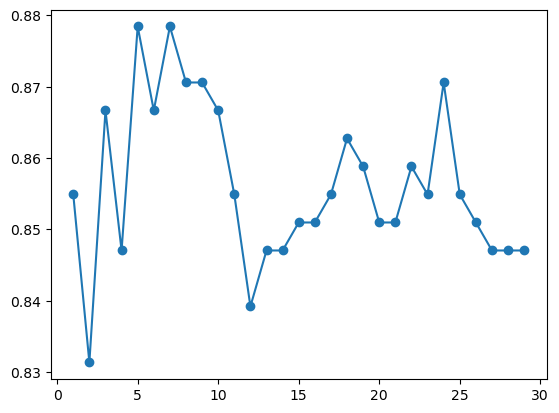

In [3140]:
print(max(errors))
print(errors.index(max(errors)))
plt.plot(range(1,30), errors, 'o-')
plt.show()

In [3143]:
from sklearn.neighbors import KNeighborsClassifier
# Après avoir identifier le K le plus approprié nous allons refaire 
n_n_hog = KNeighborsClassifier(n_neighbors=4) 
n_n_hog.fit(hog_train.iloc[:,:800],hog_train.label)

KNeighborsClassifier(n_neighbors=4)

In [3145]:
print(n_n_hog.score(hog_train.iloc[:,:800],hog_train.label))
print(n_n_hog.score(hog_valid.iloc[:,:800],hog_valid.label))
print(n_n_hog.score(hog_test.iloc[:,:800],hog_test.label))

0.9394957983193277
0.8470588235294118
0.8352941176470589


In [ ]:
knn_hog = n_n_hog.predict(hog_competition.iloc[:,:]) 

In [ ]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = knn_hog
df

In [3147]:
df.to_csv('myfirstsubmission_KNN_HOG.csv', index=False)

### Random forest

In [3149]:
from sklearn.ensemble import RandomForestClassifier
errors = []
for i in range(1,40):
    # valeur initiale de l'arbre est 1
    models = RandomForestClassifier(n_estimators=i) 
    errors.append(models.fit(hog_train.iloc[:,:800],hog_train.label).score(hog_test.iloc[:,:800], hog_test.label))
    # differenteS valeurs des erreurS
    print(errors) 

[0.6274509803921569]
[0.6274509803921569, 0.6313725490196078]
[0.6274509803921569, 0.6313725490196078, 0.6352941176470588]
[0.6274509803921569, 0.6313725490196078, 0.6352941176470588, 0.6588235294117647]
[0.6274509803921569, 0.6313725490196078, 0.6352941176470588, 0.6588235294117647, 0.6862745098039216]
[0.6274509803921569, 0.6313725490196078, 0.6352941176470588, 0.6588235294117647, 0.6862745098039216, 0.7529411764705882]
[0.6274509803921569, 0.6313725490196078, 0.6352941176470588, 0.6588235294117647, 0.6862745098039216, 0.7529411764705882, 0.7215686274509804]
[0.6274509803921569, 0.6313725490196078, 0.6352941176470588, 0.6588235294117647, 0.6862745098039216, 0.7529411764705882, 0.7215686274509804, 0.7647058823529411]
[0.6274509803921569, 0.6313725490196078, 0.6352941176470588, 0.6588235294117647, 0.6862745098039216, 0.7529411764705882, 0.7215686274509804, 0.7647058823529411, 0.7725490196078432]
[0.6274509803921569, 0.6313725490196078, 0.6352941176470588, 0.6588235294117647, 0.68627450

In [3150]:
# Nous allons afficher la valeur qui correspond à la meuilleure erreur
print(max(errors))
print(errors.index(max(errors))) 

0.8823529411764706
26


In [3153]:
r_f_hog = RandomForestClassifier(n_estimators=27) 
r_f_hog.fit(hog_train.iloc[:,:800],hog_train.label) 

RandomForestClassifier(n_estimators=27)

In [3181]:
print(r_f_hog.score(hog_test.iloc[:,:800], hog_test.label))
print(r_f_hog.score(hog_valid.iloc[:,:800], hog_valid.label))
print(r_f_hog.score(hog_train.iloc[:,:800],hog_train.label))

0.8313725490196079
0.8745098039215686
1.0


In [3182]:
from sklearn.ensemble import RandomForestClassifier
errors1 = []
for i in range(1,40):
    models = RandomForestClassifier(n_estimators=i) 
    errors1.append(models.fit(hog_train.iloc[:,:800],hog_train.label).score(hog_test.iloc[:,:800], hog_test.label))
    print(errors1)

[0.6431372549019608]
[0.6431372549019608, 0.5803921568627451]
[0.6431372549019608, 0.5803921568627451, 0.6549019607843137]
[0.6431372549019608, 0.5803921568627451, 0.6549019607843137, 0.6941176470588235]
[0.6431372549019608, 0.5803921568627451, 0.6549019607843137, 0.6941176470588235, 0.7058823529411765]
[0.6431372549019608, 0.5803921568627451, 0.6549019607843137, 0.6941176470588235, 0.7058823529411765, 0.7490196078431373]
[0.6431372549019608, 0.5803921568627451, 0.6549019607843137, 0.6941176470588235, 0.7058823529411765, 0.7490196078431373, 0.7333333333333333]
[0.6431372549019608, 0.5803921568627451, 0.6549019607843137, 0.6941176470588235, 0.7058823529411765, 0.7490196078431373, 0.7333333333333333, 0.7803921568627451]
[0.6431372549019608, 0.5803921568627451, 0.6549019607843137, 0.6941176470588235, 0.7058823529411765, 0.7490196078431373, 0.7333333333333333, 0.7803921568627451, 0.7843137254901961]
[0.6431372549019608, 0.5803921568627451, 0.6549019607843137, 0.6941176470588235, 0.70588235

In [3183]:
print(max(errors1)) 
print(errors1.index(max(errors1))) 

0.8666666666666667
30


In [3184]:
r_f_hog1 = RandomForestClassifier(n_estimators=18) 
r_f_hog1.fit(hog_train.iloc[:,:800],hog_train.label) 

RandomForestClassifier(n_estimators=18)

In [3186]:
random_hog = r_f_hog.predict(hog_competition.iloc[:,:]) #la prédiction de notre jeu de données 

In [3187]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = random_hog
df

,Id,label
0,1,22
1,2,16
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,16
497,498,6
498,499,22


In [3188]:
df.to_csv('myfirstsubmission_RANDOMFOREST_HOG.csv', index=False)

### Logistic regression

In [3190]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(32,32), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1))))

In [3191]:
data_train_hog, data_test_hog = train_test_split( dataset, test_size=0.30, random_state=42)
data_valid_hog, data_test_hog = train_test_split(data_test_hog, test_size=0.5, random_state=42)

In [3192]:
hog_train1 = data_train_hog.apply(my_hog, axis=1, args=(8,4))
hog_valid1= data_valid_hog.apply(my_hog, axis=1, args=(8,4))
hog_test1 = data_test_hog.apply(my_hog, axis=1, args=(8,4))
hog_train1['label'] = data_train_hog.label
hog_valid1['label'] = data_valid_hog.label
hog_test1['label'] = data_test_hog.label

In [3193]:
poly_i = PolynomialFeatures(degree = 1)    
X_train_i = poly_i.fit_transform(hog_train1.iloc[:,:512])
X_valid_i = poly_i.fit_transform(hog_valid1.iloc[:,:512])
    
lr_models3 = LogisticRegression(max_iter=1000).fit(X_train_i, hog_train1.label)

In [3194]:
X_test = poly_i.fit_transform(hog_test1.iloc[:,:512])
X_valid = poly_i.fit_transform(hog_valid1.iloc[:,:512])
print(lr_models3.score(X_test, hog_test1.label))
print(lr_models3.score(X_valid, hog_valid1.label))

0.8313725490196079
0.8509803921568627


In [3195]:
def my_hog_comp1(row, ori, cell):
    return(pd.Series(hog(row.iloc[0:].to_numpy().reshape(32,32), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1))))

In [3196]:
hog_competition1 = competition.apply(my_hog_comp1, axis=1, args=(8,4))
X_competition = poly_i.fit_transform(hog_competition1.iloc[:,:512])
hog_competition1

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3197]:
logistic_hog = lr_models3.predict(X_competition)

In [3198]:
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = logistic_hog
df

,Id,label
0,1,22
1,2,16
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,16
497,498,6
498,499,22


In [3199]:
df.to_csv('myfirstsubmission_LOGISTIC_REGRESSION_HOG.csv', index=False)